# Pre-Processing ve Feature Engineering

## Pre-Processing

### Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from sklearn.preprocessing import LabelEncoder

import warnings 
warnings.filterwarnings('ignore')

sys.path.append(os.path.abspath(os.path.join('..')))
from src.visual import plot_multi_boxplot, has_outliers

In [2]:
df = pd.read_csv('../data/raw/main_data.csv')

### Outliers

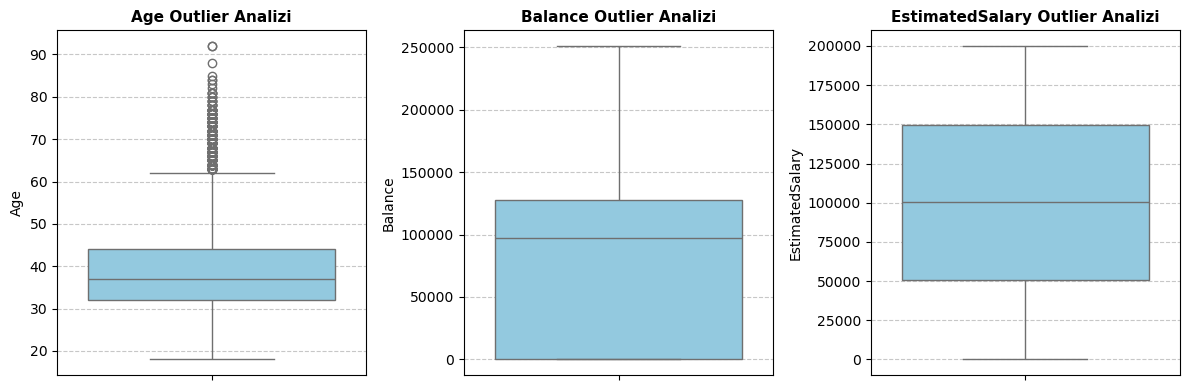

In [3]:
numeric_variables = ['Age', 'Balance', 'EstimatedSalary']
plot_multi_boxplot(df, numeric_variables)

In [4]:
for var in numeric_variables:
    print(var, "has " , has_outliers(df, [var]),  "Outliers")

Age has  None Outliers
Balance has  None Outliers
EstimatedSalary has  None Outliers


**Key Insights:** 
*    As we see on plots and output with 'has_outliers' function, there is not important outliers on numerical variables.

### Encoding

In [5]:
df["IsActiveMember"] = df["IsActiveMember"].astype("category")
df["Geography"] = df["Geography"].astype("category")
df["Gender"] = df["Gender"].astype("category")

one_hot_columns = ['Geography', 'Gender', 'IsActiveMember']
df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,IsActiveMember_1
0,1,15634602,Hargrave,619,42,2,0.00,1,1,101348.88,1,False,False,False,True
1,2,15647311,Hill,608,41,1,83807.86,1,0,112542.58,0,False,True,False,True
2,3,15619304,Onio,502,42,8,159660.80,3,1,113931.57,1,False,False,False,False
3,4,15701354,Boni,699,39,1,0.00,2,0,93826.63,0,False,False,False,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,79084.10,0,False,True,False,True


**Key Insights:** 
*    We need to encode categorical data to machine can detect them.
     *    For the first step we changed the data types of these features to 'category'
     *    After that encoded them with 'get_dummies()' function

## Feature Engineering

### Creating New Features

In [6]:
df["TenureOverAge"] = df["Tenure"] / df["Age"]
df["BalanceOverSalary"] = df["Balance"] / df["EstimatedSalary"]
df["Credit_Age_Ratio"] = df["CreditScore"] / df["Age"]
df["Balance_Per_Product"] = df["Balance"] / df["NumOfProducts"]
df["Active_Monetary_Value"] = df["Balance"] * df["IsActiveMember_1"]
df["Has_Balance"] = df["Balance"].apply(lambda x: 1 if x > 0 else 0)
df["Age_Group"] = pd.cut(df["Age"], bins=[18, 30, 45, 60, 100], labels=["0", "1", "2", "3"], include_lowest=True)
df["Credit_Score_Tier"] = pd.cut(df["CreditScore"], bins=[350, 550, 650, 750, 850], labels=["0", "1", "2", "3"], include_lowest=True)
df["Geo_Balance_Mean"] = df.groupby("Geography_Germany")["Balance"].transform("mean")
df['Balance_Rel_Geo'] = df['Balance'] / df['Geo_Balance_Mean']

**Key Insights:** 
*    Adding new features on main dataset can help to get better predictions. For this reason we created new features with using features from main dataset.
*    Some of the features from main dataset are unnecessary. We get this informations during EDA. After creating new features we dropped these unnecessary features. 

### Dropping Unnecessary Columns

In [7]:
df = df.drop(["CustomerId","Surname","RowNumber", "HasCrCard", "Tenure"], axis = 1)

**Key Insights:**
*    During EDA we analyzed that, 'HasCrCard' and 'Tenure' features are not effecting the target('Exited') feature. For this reason we can drop these features from dataset.
*    Features like 'CustomerId', 'Surname' and 'RowNumber' are also not effecting the target. And we dropped these features too

In [8]:
df.head()

,CreditScore,Age,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,IsActiveMember_1,TenureOverAge,BalanceOverSalary,Credit_Age_Ratio,Balance_Per_Product,Active_Monetary_Value,Has_Balance,Age_Group,Credit_Score_Tier,Geo_Balance_Mean,Balance_Rel_Geo
0,619,42,0.00,1,101348.88,1,False,False,False,True,0.047619,0.000000,14.738095,0.000000,0.00,0,1,1,62001.873114,0.000000
1,608,41,83807.86,1,112542.58,0,False,True,False,True,0.024390,0.744677,14.829268,83807.860000,83807.86,1,1,1,62001.873114,1.351699
2,502,42,159660.80,3,113931.57,1,False,False,False,False,0.190476,1.401375,11.952381,53220.266667,0.00,1,1,0,62001.873114,2.575096
3,699,39,0.00,2,93826.63,0,False,False,False,False,0.025641,0.000000,17.923077,0.000000,0.00,0,1,2,62001.873114,0.000000
4,850,43,125510.82,1,79084.10,0,False,True,False,True,0.046512,1.587055,19.767442,125510.820000,125510.82,1,1,3,62001.873114,2.024307


In [ ]:
output_path = '../data/processed/main_data_processed2.csv'
df.to_csv(output_path, index=False)

print(f"Data saved: {output_path}")

Veri seti kaydedildi: ../data/processed/main_data_processed2.csv


In [10]:
df2 = pd.read_csv(output_path)
df2.head()     

,CreditScore,Age,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,IsActiveMember_1,TenureOverAge,BalanceOverSalary,Credit_Age_Ratio,Balance_Per_Product,Active_Monetary_Value,Has_Balance,Age_Group,Credit_Score_Tier,Geo_Balance_Mean,Balance_Rel_Geo
0,619,42,0.00,1,101348.88,1,False,False,False,True,0.047619,0.000000,14.738095,0.000000,0.00,0,1,1,62001.873114,0.000000
1,608,41,83807.86,1,112542.58,0,False,True,False,True,0.024390,0.744677,14.829268,83807.860000,83807.86,1,1,1,62001.873114,1.351699
2,502,42,159660.80,3,113931.57,1,False,False,False,False,0.190476,1.401375,11.952381,53220.266667,0.00,1,1,0,62001.873114,2.575096
3,699,39,0.00,2,93826.63,0,False,False,False,False,0.025641,0.000000,17.923077,0.000000,0.00,0,1,2,62001.873114,0.000000
4,850,43,125510.82,1,79084.10,0,False,True,False,True,0.046512,1.587055,19.767442,125510.820000,125510.82,1,1,3,62001.873114,2.024307
